In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

SEED = 35010732 # from random.org
np.random.seed(SEED)

print(plt.style.available)
plt.style.use('seaborn-white')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [4]:
cor1000 = pd.read_csv("correlations1000.csv")
cor10k = pd.read_csv("correlations10k.csv")

In [5]:
cor1000

,rho,prho,C,dC
0,-0.9,-0.891435,-17.649097,2.954825
1,-0.9,-0.888049,-17.593690,3.064370
2,-0.9,-0.904327,-21.788510,4.007242
3,-0.9,-0.905846,-21.089639,3.682905
4,-0.9,-0.897051,-20.122535,3.667692
...,...,...,...,...
90,0.9,0.872287,14.566891,2.334621
91,0.9,0.905782,20.470898,3.534773
92,0.9,0.927319,29.128889,4.363606
93,0.9,0.903713,19.670414,3.397127


In [32]:
corr1000_avg = cor1000.groupby('rho').mean()
corr1000_std = cor1000.groupby('rho').std()

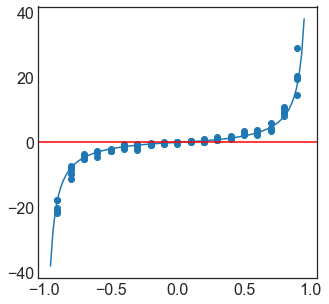

In [31]:
plt.figure(figsize=(5,5))
rho_theory = np.linspace(-0.95,0.95,100)
c_theory = 2*np.abs(rho_theory)/(1-np.abs(rho_theory))*np.sign(rho_theory)
plt.scatter(cor1000['rho'],cor1000['C'])
plt.plot(rho_theory,c_theory)
plt.axhline(y=0.0, color='r')

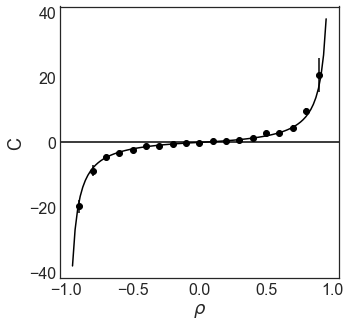

In [41]:
plt.figure(figsize=(5,5))
rho_theory = np.linspace(-0.95,0.95,100)
c_theory = 2*np.abs(rho_theory)/(1-np.abs(rho_theory))*np.sign(rho_theory)
plt.errorbar(corr1000_avg.index,corr1000_avg['C'],yerr=corr1000_std['C'],fmt="o",color='k')
plt.plot(rho_theory,c_theory,"k")
plt.axhline(y=0.0, color='k')
plt.xlabel(r'$\rho$')
plt.ylabel("C")
plt.savefig("corr.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")